In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [38]:
data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = data.sample(frac=1, random_state=42).reset_index(drop=True) #viskalit data la new index sathi rest_index kelay
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor
5,5.4,3.4,1.5,0.4,setosa
6,5.6,2.9,3.6,1.3,versicolor
7,6.9,3.1,5.1,2.3,virginica
8,6.2,2.2,4.5,1.5,versicolor
9,5.8,2.7,3.9,1.2,versicolor


In [39]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column sepal_length has values in range 4.3 to 7.9


Column sepal_width has values in range 2.0 to 4.4


Column petal_length has values in range 1.0 to 6.9


Column petal_width has values in range 0.1 to 2.5


Column species has 3 number of unique values
['versicolor' 'setosa' 'virginica']




In [40]:
for column in data.columns:
    print(data[column].value_counts())
    print("\n")

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
4.9     6
6.1     6
5.6     6
5.4     6
6.0     6
6.5     5
4.8     5
6.2     4
6.9     4
7.7     4
4.6     4
5.2     4
7.2     3
6.8     3
5.9     3
4.4     3
4.7     2
6.6     2
7.6     1
7.9     1
4.3     1
7.0     1
4.5     1
5.3     1
7.3     1
7.4     1
7.1     1
Name: sepal_length, dtype: int64


3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
2.2     3
3.6     3
3.7     3
2.4     3
3.9     2
4.4     1
4.1     1
2.0     1
4.2     1
4.0     1
Name: sepal_width, dtype: int64


1.5    14
1.4    12
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.9     5
4.7     5
4.0     5
4.4     4
4.2     4
4.8     4
1.7     4
5.0     4
6.1     3
4.1     3
5.5     3
5.7     3
5.8     3
3.9     3
4.6     3
6.0     2
3.5     2
5.3     2
3.3     2
5.4     2
4.3     2
1.2     2
1.9     2
5.9     2
6.7     2
5.2     2
3.0     1
1.1     1
3

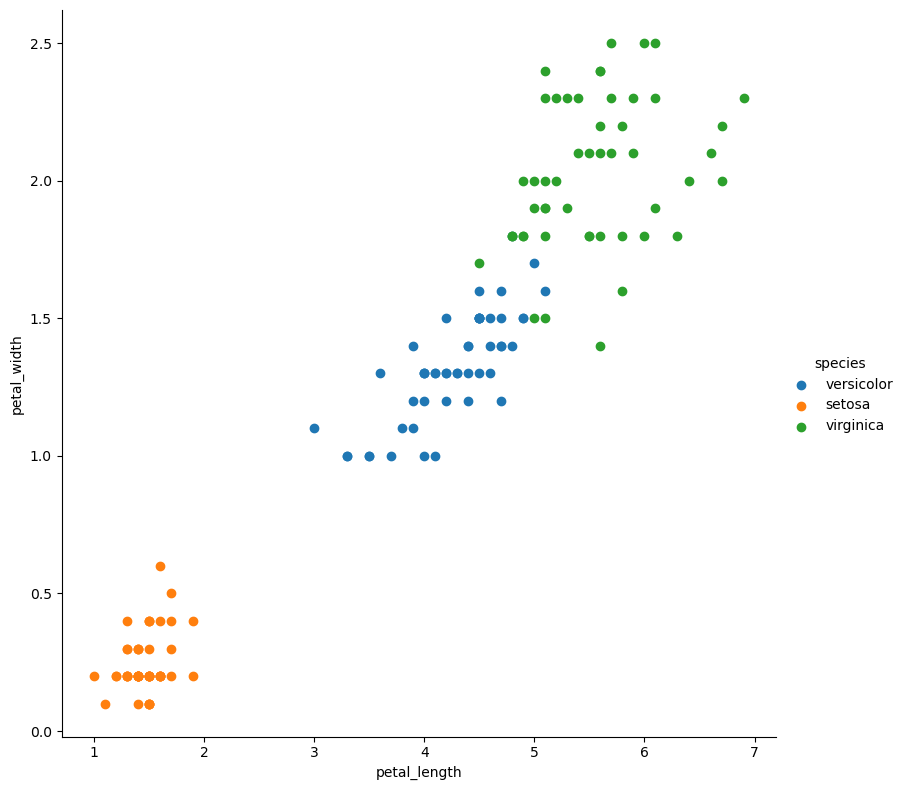

In [41]:
sns.FacetGrid(data, hue="species", height=8).map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

In [42]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)

def custom_train_test_split(X, Y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = X.shape[0]
    num_test = int(test_size * num_samples)
    
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]
    
    X_test = X[:num_test]
    Y_test = Y[:num_test]
    X_train = X[num_test:]
    Y_train = Y[num_test:]
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = custom_train_test_split(X, Y, test_size=0.2, random_state=7)

In [43]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.02)
model.fit(X_train, Y_train)

C:\Users\athar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.02, kernel='linear')

In [44]:
Y_pred=model.predict(X_test)
Y_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy for my model is: {accuracy * 100:.2f} %")

Accuracy for my model is: 96.67 %


In [46]:
print(metrics.confusion_matrix(Y_test, Y_pred)) #khar aadva ani kadhlel ubha

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [47]:
unique_classes = np.unique(Y_test)

tp_dict = {cls: 0 for cls in unique_classes}
fp_dict = {cls: 0 for cls in unique_classes}
fn_dict = {cls: 0 for cls in unique_classes}

for cls in unique_classes:
    for true, pred in zip(Y_test, Y_pred):
        if true == cls and pred == cls:
            tp_dict[cls] += 1
        elif true == cls and pred != cls:
            fn_dict[cls] += 1
        elif true != cls and pred == cls:
            fp_dict[cls] += 1

precision_dict = {}
recall_dict = {}
f1_score_dict = {}

for cls in unique_classes:
    precision_dict[cls] = tp_dict[cls] / (tp_dict[cls] + fp_dict[cls])
    recall_dict[cls] = tp_dict[cls] / (tp_dict[cls] + fn_dict[cls])
    f1_score_dict[cls] = 2 * (precision_dict[cls] * recall_dict[cls]) / (precision_dict[cls] + recall_dict[cls])

for cls in unique_classes:
    print(f"For the Class: {cls}")
    print(f"Precision: {precision_dict[cls]:.2f}")
    print(f"Recall: {recall_dict[cls]:.2f}")
    print(f"F1-Score: {f1_score_dict[cls]:.2f}")
    print("\n")


For the Class: setosa
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


For the Class: versicolor
Precision: 1.00
Recall: 0.92
F1-Score: 0.96


For the Class: virginica
Precision: 0.90
Recall: 1.00
F1-Score: 0.95




In [48]:
# var bagh setosa precision recall f1 sagle ok bcz lay dist hay 
# pan khara game versicolor ani virginica cha hota ekacha precision changla ekacha recall artha kay asel scatter plot mdhe bagh